In [1]:
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

In [1]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-03-12 16:24:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.169.59, 172.217.169.91, 142.250.179.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.169.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: '10_food_classes_10_percent.zip.2'

     0K .......... .......... .......... .......... ..........  0% 74.2K 36m58s
    50K .......... .......... .......... .......... ..........  0% 25.6M 18m32s
   100K .......... .......... .......... .......... ..........  0% 19.9M 12m24s
   150K .......... .......... .......... .......... ..........  0%  401K 11m0s
   200K .......... .......... .......... .......... ..........  0% 1.98M 9m4s
   250K .......... .......... .......... .......... ..........  0% 1.91M 7m47s
   300K .......... .......... .......... .......... ..........  

In [4]:
unzip_data("10_food_classes_10_percent.zip")

In [5]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [6]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)


test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE, label_mode='categorical', batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[164.52232    171.52232    177.52232   ]
   [164.52232    171.52232    177.52232   ]
   [164.68063    172.68063    175.68063   ]
   ...
   [ 35.897144    33.897144    34.897144  ]
   [ 34.73884     32.73884     33.73884   ]
   [ 33.73884     31.73884     32.73884   ]]

  [[168.35045    173.78348    179.78348   ]
   [167.56697    173.         177.54495   ]
   [166.78348    172.43303    176.04863   ]
   ...
   [ 33.433037    31.433037    32.433037  ]
   [ 33.21652     31.216518    32.21652   ]
   [ 33.          31.          32.        ]]

  [[167.24792    172.24792    177.63632   ]
   [165.76562    170.76562    174.76562   ]
   [163.32286    168.32286    171.32286   ]
   ...
   [ 32.305805    30.305803    31.305803  ]
   [ 33.          31.          32.        ]
   [ 33.109226    31.109226    32.109226  ]]

  ...

  [[  1.          15.          16.        ]
   [  1.          15.          16.        ]
   [  1.          15.          16.        ]
   ...
   [ 50.571472    38.571

In [11]:
#new
#base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
#old
#base_model = tf.keras.applications.EfficientNetB0(include_top=False)


In [12]:
# Functional API model example

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# if using ResNet50V2 you will need to normalize inputs (you don't have to for efficientnet
#x = tf.keras.layers.preprocessing.Rescaling(1./255)(inputs)

x = base_model(inputs)
print(f"Shape after passing through base model: {x.shape}")

# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations) 

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after passing through global average pooling 2D: {x.shape}")


# Create the output activation layer

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

#compile
model_0.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#fit and save its history
history_10_percent_0 = model_0.fit(train_data_10_percent,
                                   epochs=5,
                                   steps_per_epoch=len(train_data_10_percent),
                                   validation_data=test_data,
                                   validation_steps=int(0.25 * len(test_data)),
                                   callbacks = [create_tensorboard_callback(dir_name="transfer_learning", experiment_name="10_percent_feature_extraction")]
                                   )

Shape after passing through base model: (None, 7, 7, 1280)
Shape after passing through global average pooling 2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20250312-162618
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.2728 - loss: 2.0937 - val_accuracy: 0.7188 - val_loss: 1.3230
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7660 - loss: 1.2297 - val_accuracy: 0.8405 - val_loss: 0.8628
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 916ms/step - accuracy: 0.8292 - loss: 0.8694 - val_accuracy: 0.8520 - val_loss: 0.6953
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 935ms/step - accuracy: 0.8252 - loss: 0.7135 - val_accuracy: 0.8668 - val_loss: 0.6011
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 744ms/step - accuracy: 0.8817 - loss: 0.5761 - val_accuracy: 0.8586 - val_loss: 0.5480


In [13]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 530ms/step - accuracy: 0.8629 - loss: 0.5479


[0.5642821788787842, 0.8592000007629395]

In [14]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          0 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ normalization[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      4,608 │ stem_activation[… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, None,      │      9,216 │ block1a_project_… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, None,      │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, None,      │          0 │ block2a_expand_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, None,      │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, None,      │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, None,      │     36,864 │ block2a_project_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, None,      │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, None,      │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 5,919,312 (22.58 MB)

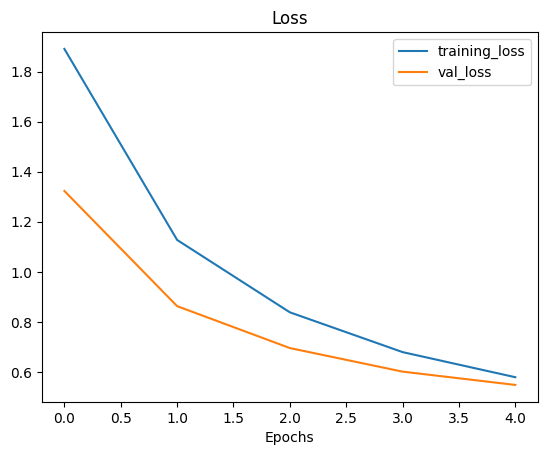

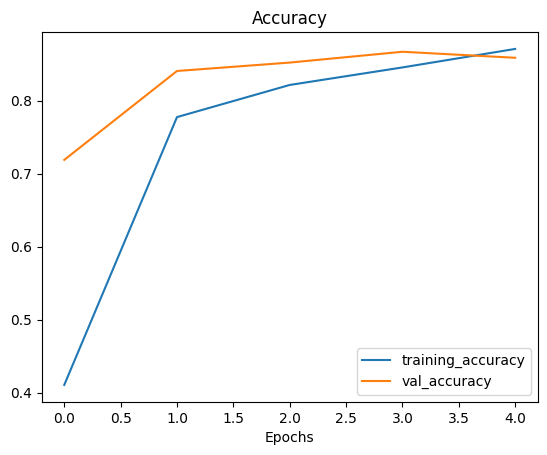

In [15]:
# Check out model's training curves

plot_loss_curves(history_10_percent_0)

In [16]:
# Getting a Feature Vector from a trained model

input_shape = (1,4,4,3)
tf.random.set_seed(42)

input_tensor = tf.random.normal(input_shape)

print(f"Random input tensor:\n {input_tensor}\n")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.26454744]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.891714   -0.9384712 ]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728497  0.40125778 -1.4145442 ]
   [-0.59318566 -1.6617213   0.33567193]
   [ 0.10815629  0.2347968  -0.56668764]
   [-0.35819843  0.88698626  0.5274477 ]]]]



In [17]:
# Pass the random tensor through a global average pooling 2d Layer

global_average_pooled_tensor =   tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2d Global average pooled tensor:\n {global_average_pooled_tensor}\n")

2d Global average pooled tensor:
 [[-0.09368646 -0.45840445 -0.28855976]]



In [18]:
# check shape

print(f"Shape of input tensor: {input_tensor.shape}\n")
print(f"Shape of pooled tensor: {global_average_pooled_tensor.shape}\n")

Shape of input tensor: (1, 4, 4, 3)

Shape of pooled tensor: (1, 3)



In [19]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840445, -0.28855976]], dtype=float32)>

In [20]:
#plan
# model_1 -- use feature extraction transfer learning with 1% of the training data with data augmentation
# model_2 -- use feature extraction transfer learning with 10% of the training data with data augmentation
# model_3 -- use fine-tuning transfer learning on 10% with of the training data with data augmentation
# model_4 -- use fine-tuning transer learning on 100% of the training data with data augmentation

In [21]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2025-03-12 16:29:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.201.123, 216.58.204.91, 216.58.213.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.201.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: '10_food_classes_1_percent.zip.1'

     0K .......... .......... .......... .......... ..........  0% 3.56M 36s
    50K .......... .......... .......... .......... ..........  0%  454K 2m42s
   100K .......... .......... .......... .......... ..........  0%  637K 2m56s
   150K .......... .......... .......... .......... ..........  0% 1017K 2m44s
   200K .......... .......... .......... .......... ..........  0% 1.03M 2m36s
   250K .......... .......... .......... .......... ..........  0% 1.54M 2m24s
   300K .......... .......... .......... .......... ..........  0% 1.81M 

In [22]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir_1_percent = "10_food_classes_1_percent/test"

In [23]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [24]:
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    image_size=IMG_SIZE,
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir_1_percent,
    label_mode='categorical',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [25]:
# adding data augmentation into the model
print(tf.__version__)

2.18.0


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# https://www.tensorflow.org/guide/keras/preprocessing_layers

data_augmentation = keras.Sequential([
    layers.InputLayer(shape=(224, 224, 3)),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    #layers.RandomContrast(0.2),
    #layers.rescale(1./255),
], name="data_augmentation")

In [27]:
#augmented_img = data_augmentation(img)
#augmented_img = data_augmentation(img, training=True)

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
print(target_dir)


10_food_classes_1_percent/train/ramen


10_food_classes_1_percent/train/ramen/864580.jpg


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input [[[216. 242. 241.]
  [220. 246. 245.]
  [224. 248. 248.]
  ...
  [ 14.  30.  66.]
  [ 14.  30.  66.]
  [ 16.  32.  68.]]

 [[222. 248. 249.]
  [226. 252. 251.]
  [228. 252. 254.]
  ...
  [ 17.  33.  69.]
  [ 17.  33.  69.]
  [ 17.  33.  69.]]

 [[222. 247. 251.]
  [225. 251. 252.]
  [227. 252. 255.]
  ...
  [ 20.  36.  72.]
  [ 18.  34.  70.]
  [ 16.  32.  68.]]

 ...

 [[  7.   7.  17.]
  [ 13.  13.  23.]
  [ 15.  18.  27.]
  ...
  [ 26.  23.  42.]
  [ 19.  14.  34.]
  [ 17.  12.  32.]]

 [[ 13.  13.  25.]
  [ 18.  18.  30.]
  [ 17.  20.  29.]
  ...
  [ 28.  25.  46.]
  [ 18.  13.  33.]
  [ 19.  14.  34.]]

 [[ 12.  12.  24.]
  [ 15.  15.  27.]
  [ 12.  15.  24.]
  ...
  [ 26.  23.  44.]
  [ 19.  14.  34.]
  [ 25.  20.  40.]]]. Expected shape (None, 224, 224, 3), but input has incompatible shape (512, 384, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(512, 384, 3), dtype=uint8)
  • training=None
  • mask=None

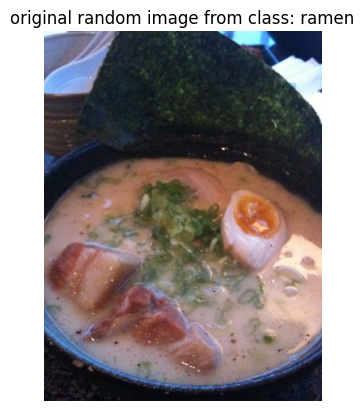

In [31]:
# random_image = random.choice(os.listdir(target_dir))
# random_image_path = target_dir+"/"+random_image
# 
# print(random_image_path)
# img = mpimg.imread(random_image_path)
# plt.imshow(img)
# 
# plt.title(f"original random image from class: {target_class}")
# plt.axis(False)
# augmented_image = data_augmentation(img)
# #augmented_image = data_augmentation(tf.expand_dims(img, axis=0))
# plt.figure()
# plt.title(f"Augmented random image from class: {target_class}")
# plt.axis(False)
# plt.imshow(augmented_image/255.)
# print(augmented_image)

In [32]:
# MODEL 1

In [33]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer") # INPUT LAYER
x = data_augmentation(inputs) # DATA AUGMENTATION LAYER
x = base_model(x, training=False) # GIVE base_model THE INPUTS AND DONT TRAIN TI
x = layers.GlobalAveragePooling2D (name="global_average_pooling_layer")(x) # Pool output features of the base model

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x) #put a dense layer on as the ouptut

model_1 = keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history_1_percent = model_1.fit(
    train_data_1_percent, 
    epochs=5, 
    steps_per_epoch=len(train_data_1_percent), 
    validation_data=test_data, 
    validation_steps=int(0.25 * len(test_data)),
    callbacks = [create_tensorboard_callback(dir_name="transfer_learning", experiment_name="1_percent_data_augmentation")]
)



Saving TensorBoard log files to: transfer_learning/1_percent_data_augmentation/20250312-163353
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.1086 - loss: 2.2950 - val_accuracy: 0.1579 - val_loss: 2.2906
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.1795 - loss: 2.1768 - val_accuracy: 0.1908 - val_loss: 2.1922
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 0.4266 - loss: 1.9911 - val_accuracy: 0.2697 - val_loss: 2.0924
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.5078 - loss: 1.7647 - val_accuracy: 0.3503 - val_loss: 1.9894
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.4213 - loss: 1.7650 - val_accuracy: 0.3997 - val_loss: 1.9140


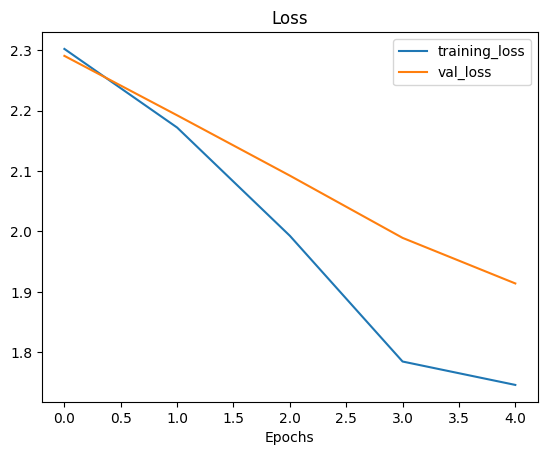

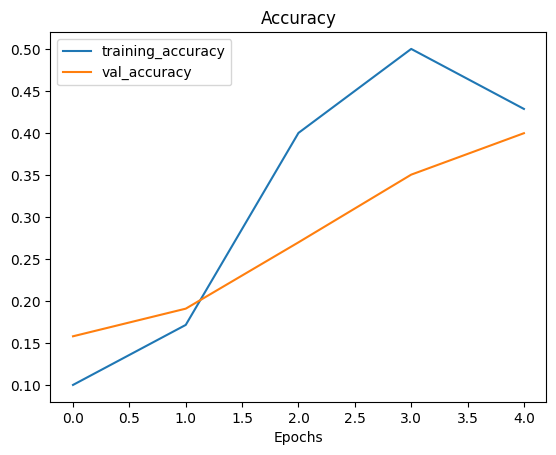

In [34]:
plot_loss_curves(history_1_percent)

In [ ]:
#model 2

In [35]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir_10_percent = "10_food_classes_10_percent/test"

In [36]:
import tensorflow as tf

IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_10_percent, 
    label_mode='categorical', 
    image_size=IMG_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=IMG_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [37]:
from keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers 

data_augmentation_model2 =  Sequential([
    layers.InputLayer(shape=(224, 224, 3)),
    layers.RandomFlip('horizontal'),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
], name="data_augmentation_model2")



In [38]:
input_shape = (224,224,3)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation_model2(inputs)
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode. Batchnorm layers dont get updated
x = layers.GlobalAveragePooling2D (name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [39]:
model_2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_model2        │ (None, None, None, 3)  │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, None, None,     │     5,919,312 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,932,122 (22.63 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 5,919,312 (22.58 MB)

In [43]:
# model checkpoint callback. saves our model during training

checkpoint_path = "model_checkpoints/checkpoint.weights.h5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    save_weights_only=True,
    save_best_only=False,
    save_freq="epoch",
    verbose=1
)

In [44]:
initial_epochs = 5
history_model_2 = model_2.fit(
    train_data_10_percent, 
    epochs=initial_epochs, 
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data,
    validation_steps=int(0.25 * len(test_data)),
    callbacks= [
        create_tensorboard_callback(dir_name="transfer_learning", experiment_name="1_percent_data_augmentation"),
        checkpoint_callback
    ],
)

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmentation/20250312-164925
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.1777 - loss: 2.2070
Epoch 1: saving model to model_checkpoints/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.1824 - loss: 2.2011 - val_accuracy: 0.5329 - val_loss: 1.6339
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.5516 - loss: 1.5616
Epoch 2: saving model to model_checkpoints/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 959ms/step - accuracy: 0.5537 - loss: 1.5581 - val_accuracy: 0.7467 - val_loss: 1.1247
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.6712 - loss: 1.2106
Epoch 3: saving model to model_checkpoints/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6721 - loss: 1.2086 - val_accuracy: 0.7928 - val_loss: 0.8853
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.7438 - loss: 0.9936
Epoch 4: saving model 

In [45]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 44s 540ms/step - accuracy: 0.8606 - loss: 0.5447


[0.5642822980880737, 0.8592000007629395]

In [46]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 43s 549ms/step - accuracy: 0.8198 - loss: 0.6951


[0.706022322177887, 0.8136000037193298]

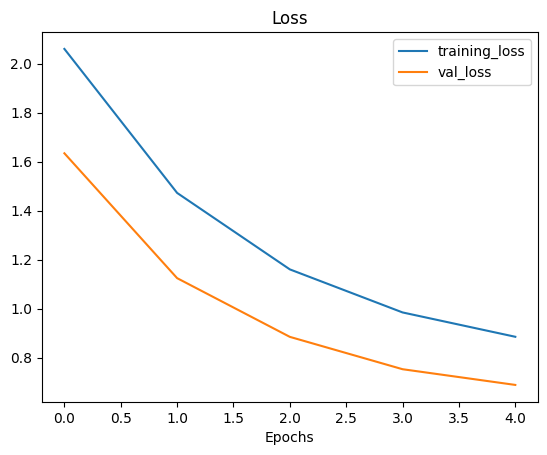

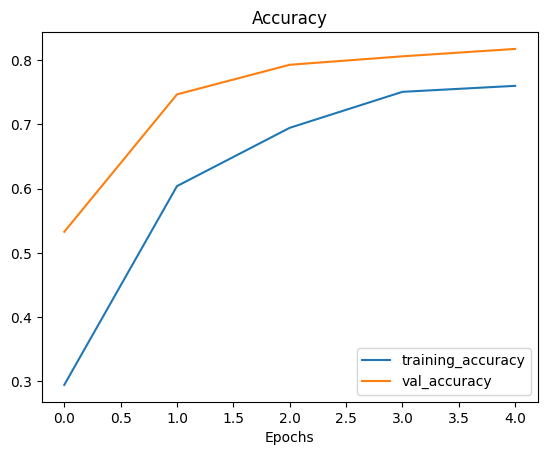

In [48]:
plot_loss_curves(history_model_2)

In [2]:
##### MDDEL 3

In [5]:
import tensorflow as tf

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False,
    weights='imagenet',
)
base_model.trainable  = True

for layer in base_model.layers[:-10]: # except last 10
    layer.trainable = False
    

